In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')
import numpy as np

# A Cantilever beam acted upon by an end load

The $\sigma_x$ variation at a given section is given by 

$$\sigma_x = \frac{My}{I}$$


The deflection of the end of the beam is given as 

$$\delta_B = \frac{FL^3}{3EI}$$

For a end loaded cantilever the bending moment varies with the length of the beam, and is zero at the free end
and increases towards its fixed end.

In the following analysis, we will take different length to width ratios, which prescribes thin plate to thick plate in two dimension. Then with the load, we will check the variation of maximum $\sigma_x$ and other stresses. 

A cantilever beam made of steel is been acted upon by a force for a 
deflection. The material properties of the beam are as follows, 210 GPa. Poisson ratio 0.3, 
density of 7800 kg / m^3. 

the following lengths are considered in the process. 

    1. L = 0.1 m, and H = 0.01 m. ratio is 10, the deflection of 0.01, force (calculated from above equation) is 525000.0 N   
    2. L = 0.2 m, and H = 0.01 m, ratio is 20, the deflection of 0.02, force (calculated from above equation) is 131250.0 

As a first case compute the stresses induced in this beam from airy stress function.

force to be applied is
262500.0
max sigma_x is  1.575


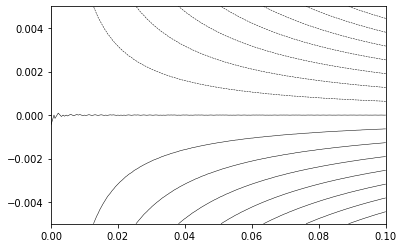

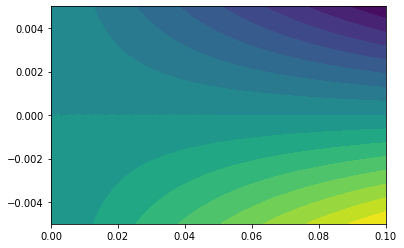

In [4]:
from pysph.tools.geometry import get_2d_tank, get_2d_block
import matplotlib.tri as tri
import matplotlib.pyplot as plt

deflection = 0.005
E = 210 * 1e9
H = 0.01
L = 0.1
I = H**3. / 12.
F = deflection * 3. * E * I / L**3.
print("force to be applied is")
print(F)

spacing = H / 11
x, y = get_2d_block(dx=spacing, length=L, height=H)
x += -(min(x))

sigma_x = - (F * x * y) / I
print("max sigma_x is ", max(sigma_x)*1e-09)

plt.tricontour(x, y, sigma_x, 15, linewidths=0.5, colors='k')
plt.show()
plt.clf()
plt.tricontourf(x, y, sigma_x, 15)

Text(0, 0.5, 'y')

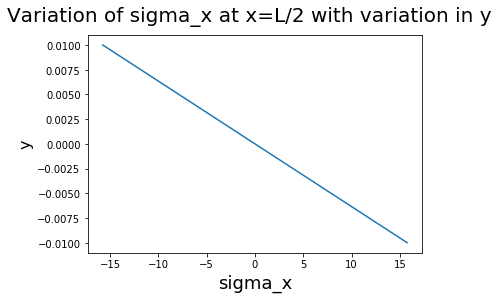

In [5]:
# plot the stress (sigma_0) at L/2
x = np.ones(10) * L/2.
y = np.linspace(-H, H, 10)
sigma_x = - (F * x * y) / I * 1e-8
fig = plt.figure()
plt.plot(sigma_x, y)
fig.suptitle('Variation of sigma_x at x=L/2 with variation in y', fontsize=20)
plt.xlabel('sigma_x', fontsize=18)
plt.ylabel('y', fontsize=16)

Now we deal with second case compute the stresses induced in this beam from airy stress function.

force to be applied is
65625.0
max sigma_x is  0.7875


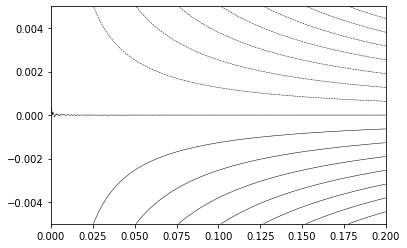

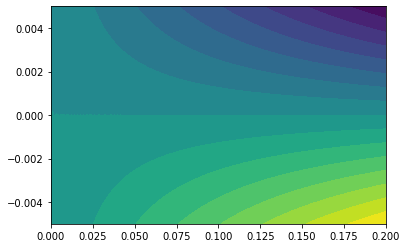

In [6]:
deflection = 0.01
E = 210 * 1e9
H = 0.01
L = 0.2
I = H**3. / 12.
F = deflection * 3. * E * I / L**3.
print("force to be applied is")
print(F)


spacing = H / 11
x, y = get_2d_block(dx=spacing, length=L, height=H)
x += -(min(x))

sigma_x = - (F * x * y) / I
print("max sigma_x is ", max(sigma_x)*1e-09)

plt.tricontour(x, y, sigma_x, 15, linewidths=0.5, colors='k')
plt.show()
plt.clf()
plt.tricontourf(x, y, sigma_x, 15)

Text(0, 0.5, 'y')

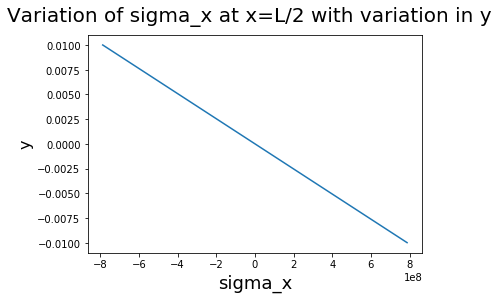

In [7]:
# plot the stress (sigma_0) at L/2
x = np.ones(10) * L/2.
y = np.linspace(-H, H, 10)
sigma_x = - (F * x * y) / I
fig = plt.figure()
plt.plot(sigma_x, y)
fig.suptitle('Variation of sigma_x at x=L/2 with variation in y', fontsize=20)
plt.xlabel('sigma_x', fontsize=18)
plt.ylabel('y', fontsize=16)

In [8]:
from pysph.solver.utils import iter_output, load, get_files

def plot_max_y_position_of_beam(folder, length, deflection, step=30):
    files = get_files(folder)
    t, max_y = [], []
    for sd, array in iter_output(files[::step], 'plate'):
        _t = sd['t']
        t.append(_t)
        max_y.append(max(array.y))

    label = 'max y position of plate with length ' + str(length) + 'm and a deflection of ' + str(deflection)
    plt.plot(t, max_y, label=label)

    plt.xlabel('t')
    plt.ylabel('Max y')
    plt.legend()
    plt.show()
    
    
def plot_axial_displacement_at_midsection(folder, length, height, deflection):
    files = get_files(folder)
    data = load(files[0])
    # solver_data = data['solver_data']
    arrays = data['arrays']
    pa = arrays['plate']
    indices_half_way = np.where(pa.indices_half_way == 1)
    print(indices_half_way)
    first_file = files[0]
    x_position_analytical = pa.x[indices_half_way[0][0]]
    print(x_position_analytical)

    # -----------------------------
    # Now get the theoretical value
    from pysph.tools.geometry import get_2d_tank, get_2d_block
    import matplotlib.tri as tri
    import matplotlib.pyplot as plt
    from pysph.sph.solid_mech.basic import (get_speed_of_sound, get_bulk_mod,
                                            get_shear_modulus)

    deflection = deflection
    E = 210 * 1e9
    nu = 0.3
    G = get_shear_modulus(E, nu)
    H = height
    L = length
    I = H**3. / 12.
    F = deflection * 3. * E * I / L**3.
    print("force to be applied is")
    print(F)

    spacing = H / 11
    x, y = get_2d_block(dx=spacing, length=L, height=H)
    x += -(min(x))

    sigma_x = - (F * x * y) / I
    #print("max sigma_x is ", max(sigma_x)*1e-09)

    # plot the axial displacemet (u) at L/2
    x = np.ones(10) * (L - x_position_analytical)
    y = np.linspace(-H/2, H/2, 10)
    tmp1 = (F * x**2 * y) / (2 * E * I)
    tmp2 = (nu * F * y**3) / (6 * E * I)
    tmp3 = (F * y**3) / (6 * G * I)
    tmp4 = (F * x**2 * y) / (2 * E * I)
    tmp5 = (F * H**2) / (8 * G * I)
    axial_disp = - tmp1 - tmp2 + tmp3 + tmp4 - tmp5


    plt.plot(axial_disp * 1e-4, y, label="Theoretical axial displacement")
    # fig.suptitle('Variation of sigma_x at x=L/2 with variation in y', fontsize=20)
    plt.xlabel('axial displacemt (* 1e-4)', fontsize=18)
    plt.ylabel('y', fontsize=16)
    plt.legend()


    # plt.show()


    # plt.figure()
    first_file = files[0]
    data = load(first_file)
    arrays = data['arrays']
    pa = arrays['plate']
    x_initial = pa.x[indices_half_way[0]]

    last_file = files[-1]
    data = load(last_file)
    # solver_data = data['solver_data']
    arrays = data['arrays']
    pa = arrays['plate']
    y = pa.y[indices_half_way[0]]
    sph_x = pa.x[indices_half_way[0]]
    print("SPH x positions is ", )
    # print("maximum of sigma_00 is ", max(sigma_00)*1e-6, ' mpa')
    label = 'x_vs_y with length ' + str(length) + ' and a deflection of ' + str(deflection)

    displacement = sph_x - x_initial
    plt.plot(displacement, y, label=label)
    plt.xlabel('x')
    plt.ylabel('y')
    #plt.legend()

    plt.show()
    
    
def plot_vertical_displacement_of_midway_of_beam_y_0(folder, length, height,
                                                     deflection, file_end=-5, material="steel"):
    # -----------------------------
    # Now get the theoretical value
    from pysph.tools.geometry import get_2d_tank, get_2d_block
    import matplotlib.tri as tri
    import matplotlib.pyplot as plt
    from pysph.sph.solid_mech.basic import (get_speed_of_sound, get_bulk_mod,
                                            get_shear_modulus)
    
    if material == "steel":
        E = 210 * 1e9
        nu = 0.3
        G = get_shear_modulus(E, nu)
    elif material == "aluminium":
        plate_rho0 = 2800
        plate_G = 26.5 * 1e6
        plate_K = 69 * 1e6
        plate_nu = (3. * self.plate_K - 2. * self.plate_G) / (
                        6. * self.plate_K + 2. * self.plate_G)
        plate_E = 2. * self.plate_G * (1 + self.plate_nu)
        
        E = plate_E
        nu = plate_nu
        G = plate_G

    deflection = deflection
    
    H = height
    L = length
    I = H**3. / 12.
    F = deflection * 3. * E * I / L**3.
    print("force to be applied is")
    print(F)

    spacing = H / 11
    x, y = get_2d_block(dx=spacing, length=L, height=H)
    x += -(min(x))

    sigma_x = - (F * x * y) / I
    #print("max sigma_x is ", max(sigma_x)*1e-09)

    # plot the vert displacemet (v) at midline
    x = np.linspace(0., L, 1000)

    tmp1 = (F * x**3) / (6 * E * I)
    tmp2 = (F * L**2 * x) / (2 * E * I)
    tmp3 = (F * L**3) / (3 * E * I)
    tmp4 = (F * H**2) / (8 * G * I) * (L - x)

    vert_disp = tmp1 - tmp2 + tmp3 + tmp4


    plt.plot(-x - (min(-x)), vert_disp, label="Theoretical vertical displacement")
    # fig.suptitle('Variation of sigma_x at x=L/2 with variation in y', fontsize=20)
    plt.xlabel('x', fontsize=18)
    plt.ylabel('vertical displacement', fontsize=16)
    plt.legend()

    files = get_files(folder)
    data = load(files[0])
    # solver_data = data['solver_data']
    arrays = data['arrays']
    pa = arrays['plate']
    indices_mid_way = np.where(pa.indices_mid_way == 1)

    last_file = files[file_end]
    data = load(last_file)
    # solver_data = data['solver_data']
    arrays = data['arrays']
    pa = arrays['plate']
    x = pa.x[indices_mid_way[0]]
    sph_y = pa.y[indices_mid_way[0]]
    # print("maximum of sigma_00 is ", max(sigma_00)*1e-6, ' mpa')
    label = 'x_vs_y with length ' + str(length) + ' and a deflection of ' + str(deflection)

    plt.plot(x, sph_y, label="SPH vertical displacement")
    plt.legend()
    plt.show()


def plot_shear_stress_of_midway_of_beam_y_0(folder, length, height, deflection, file_end=-5):
        # -----------------------------
    # Now get the theoretical value
    from pysph.tools.geometry import get_2d_tank, get_2d_block
    import matplotlib.tri as tri
    import matplotlib.pyplot as plt
    from pysph.sph.solid_mech.basic import (get_speed_of_sound, get_bulk_mod,
                                            get_shear_modulus)

    deflection = deflection
    E = 210 * 1e9
    nu = 0.3
    G = get_shear_modulus(E, nu)
    H = height
    L = length
    I = H**3. / 12.
    F = deflection * 3. * E * I / L**3.
    print("force to be applied is")
    print(F)

    spacing = H / 11
    x, y = get_2d_block(dx=spacing, length=L, height=H)
    x += -(min(x))

    # at mid way
    tau_xy = - (F * H**2.) / (8 * I) * np.ones_like(x)

    plt.plot(x, tau_xy, label="Theoretical shear stress at y=0")
    # fig.suptitle('Variation of sigma_x at x=L/2 with variation in y', fontsize=20)
    plt.xlabel('x', fontsize=18)
    plt.ylabel('shear stress', fontsize=16)
    plt.legend()

    files = get_files(folder)
    data = load(files[0])
    # solver_data = data['solver_data']
    arrays = data['arrays']
    pa = arrays['plate']
    indices_mid_way = np.where(pa.indices_mid_way == 1)
    x = pa.x[indices_mid_way[0]]

    last_file = files[file_end]
    data = load(last_file)
    # solver_data = data['solver_data']
    arrays = data['arrays']
    pa = arrays['plate']
    tau_xy = pa.sigma01[indices_mid_way[0]]
    # print("maximum of sigma_00 is ", max(sigma_00)*1e-6, ' mpa')
    label = 'x_vs_sigma_xy with length ' + str(length) + ' and a force of ' + str(F) + 'N'

    plt.plot(x, -tau_xy, label="SPH shear displacement")
    plt.legend()
    
    fname = "sigma01" + "_for_a_length_of_" + str(length) + "_deflection_of_" + str(deflection)
    fname = fname.replace(".", "_")
    print(fname)
    plt.title(f'Length = {length}, Force = {F}')
    plt.savefig(fname, dpi=400)

    plt.show()
    

In [9]:
from pysph.sph.basic_equations import SummationDensity
from pysph.sph.equation import Group, MultiStageEquations


    
def plot_sigma_00_at_midsection(folder, length, height, deflection, step=30, interpolator="shepard"):
    import matplotlib.pyplot as plt
    files = get_files(folder)
    data = load(files[0])
    # solver_data = data['solver_data']
    arrays = data['arrays']
    pa = arrays['plate']
    indices_half_way = np.where(pa.indices_half_way == 1)
    print(indices_half_way)
    first_file = files[0]
    x_position_analytical = pa.x[indices_half_way[0][0]]
    print(x_position_analytical)


    last_file = files[-1]
    data = load(last_file)
    # solver_data = data['solver_data']
    arrays = data['arrays']
    pa = arrays['plate']
    y = pa.y[indices_half_way[0]]
    sigma_00 = pa.sigma00[indices_half_way[0]]
    print("SPH sigma_00 is ", sigma_00)
    print("maximum of sigma_00 is ", max(sigma_00)*1e-6, ' mpa')
    label = 'SPH (not interpolated)'
    plt.plot(sigma_00, y, 'k', label=label)
    plt.xlabel('sigma xx')
    plt.ylabel('y')
    #plt.legend()

    # -----------------------------
    # Now get the theoretical value
    from pysph.tools.geometry import get_2d_tank, get_2d_block
    import matplotlib.tri as tri
    import matplotlib.pyplot as plt

    deflection = deflection
    E = 210 * 1e9
    H = 0.01
    L = length
    I = height**3. / 12.
    F = deflection * 3. * E * I / L**3.
    print("force to be applied is")
    print(F)

    spacing = H / 11
    x, y = get_2d_block(dx=spacing, length=L, height=H)
    x += -(min(x))

    sigma_x = - (F * x * y) / I
    #print("max sigma_x is ", max(sigma_x)*1e-09)

    # plot the stress (sigma_0) at L/2
    x = np.ones(10) * (length - x_position_analytical)
    y = np.linspace(-height/2, height/2, 10)
    sigma_x = - (F * x * y) / I

    plt.plot(sigma_x, y, 'r', label="Theoretical")
    # fig.suptitle('Variation of sigma_x at x=L/2 with variation in y', fontsize=20)
    plt.xlabel('sigma_x')
    plt.ylabel('y')
    plt.legend()

    
    # Get the interpolated value
    from pysph.tools.interpolator import Interpolator, InterpolateSPH

    equations = Group(equations=[Group(equations=[SummationDensity(dest='plate', sources=["plate"])]),
                      Group(equations=[InterpolateSPH(dest='interpolate', sources=["plate"])])]),
    
    interp = Interpolator([pa], x=np.ones_like(y)*x_position_analytical, y=y, method=interpolator, 
                          equations=equations)
    # print(len(pa.x))
    sigma_00_interpolated = (interp.interpolate('sigma00')).ravel()
    # print(sigma_00_interpolated[indices_half_way[0]])
    label = interpolator + ' interpolator'
    plt.plot(sigma_00_interpolated, y, 'g', label=label)
    plt.legend()
    
    fname = "sigma00" + "_for_a_length_of_" + str(length) + "_deflection_of_" + str(deflection)
    fname = fname.replace(".", "_")
    print(fname)
    plt.title(f'Length = {length}, Force = {F}')
    plt.savefig(fname, dpi=400)
    
    plt.show()
    
    rho_interpolated = (interp.interpolate('rho')).ravel()
    plt.plot(rho_interpolated, y, 'g', label=label)
    plt.xlabel('rho')
    plt.ylabel('y')
    plt.savefig("rho.pdf", dpi=400)
    plt.plot()

In [10]:
import os
def plot_vertical_displacement_of_midway_of_beam_y_0_many_plots(folder, length, height,
                                                                deflection, directory_name=None, step=40, 
                                                                material="steel"):
    # -----------------------------
    # Now get the theoretical value
    from pysph.tools.geometry import get_2d_tank, get_2d_block
    import matplotlib.tri as tri
    import matplotlib.pyplot as plt
    from pysph.sph.solid_mech.basic import (get_speed_of_sound, get_bulk_mod,
                                            get_shear_modulus)

    deflection = deflection
    
    if material == "steel":
        E = 210 * 1e9
        nu = 0.3
        G = get_shear_modulus(E, nu)
    elif material == "aluminium":
        plate_rho0 = 2800
        plate_G = 26.5 * 1e6
        plate_K = 69 * 1e6
        plate_nu = (3. * plate_K - 2. * plate_G) / (
                        6. * plate_K + 2. * plate_G)
        plate_E = 2. * plate_G * (1 + plate_nu)
        
        E = plate_E
        nu = plate_nu
        G = plate_G
    
    H = height
    L = length
    I = H**3. / 12.
    F = round(deflection * 3. * E * I / L**3., 2)
    print("force to be applied is")
    print(F)

    spacing = H / 11
    x_analy, y = get_2d_block(dx=spacing, length=L, height=H)
    x_analy += -min(x_analy)

    sigma_x = - (F * x_analy * y) / I
    #print("max sigma_x is ", max(sigma_x)*1e-09)

    # plot the vert displacemet (v) at midline
    # x_analytical_array = np.linspace(0., L, 1000)

    tmp1 = (F * x_analy**3) / (6 * E * I)
    tmp2 = (F * L**2 * x_analy) / (2 * E * I)
    tmp3 = (F * L**3) / (3 * E * I)
    tmp4 = (F * H**2) / (8 * G * I) * (L - x_analy)

    vert_disp = tmp1 - tmp2 + tmp3 + tmp4
    # print("len of x is " + str(len(x)))
    # print("len of vert is " + str(len(vert_disp)))
    if directory_name == None:
        dire = "vertical_disp" + "_for_a_length_of_" + material + "_" + str(length) + "_deflection_of_" + str(deflection)
        dire = dire.replace(".", "_")
    else:
        dire = directory_name
    print("directory name is")
    print(dire)
    try: 
        os.mkdir(dire) 
    except OSError as error: 
        print(error)    
            
    files = get_files(folder)
    for sd, pa in iter_output(files[::step], 'plate'):
        plt.clf()
        _t = sd['t']
        dt = sd['dt']
        step = int(_t / dt)
        plt.plot(-x_analy - (min(-x_analy)), vert_disp, label="Theoretical vertical displacement")
        # fig.suptitle('Variation of sigma_x at x=L/2 with variation in y', fontsize=20)
        plt.xlabel('x (m)')
        plt.ylabel('vertical displacement (m)')
        # plt.xlim(min(x_analy), max(x_analy))
        # plt.ylim(-0.1 * 1e-4, 1.3 * 1e-4)
        plt.legend()
        
        data = load(files[0])
        # solver_data = data['solver_data']
        arrays = data['arrays']
        tmp = arrays['plate']
        indices_mid_way = np.where(tmp.indices_mid_way == 1)

        x = pa.x[indices_mid_way[0]]
        sph_y = pa.y[indices_mid_way[0]]
        # print("maximum of sigma_00 is ", max(sigma_00)*1e-6, ' mpa')
        label = 'x_vs_y with length ' + str(length) + ', force ' + str(F)

        plt.plot(x, sph_y, label="SPH vertical displacement")
        plt.legend()

        # print(fname)
        plt.title(f'Length = {length} m, force = {F} N')
        fname = dire + "/" + str(step)
        plt.savefig(fname, dpi=400)
        # plt.show()



# Bending of a cantilever beam with length 0.1m and 0.01 m with a deflection of 1e-4.

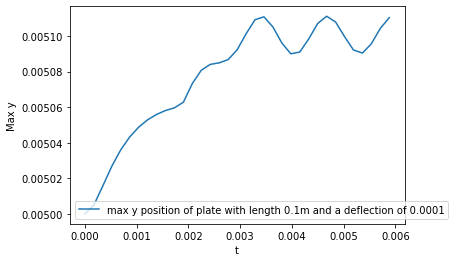

In [3]:
files = 'cantilever_bending_sun2019_len_0_1_damping_0_deflection_1e_minus_4_arti_alpha_1_0_arti_beta_0_0_prof_chandra_output/'
plot_max_y_position_of_beam(files, 0.1, 1e-4, 30)

(array([968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978]),)
0.04799999999999999
SPH sigma_00 is  [ 1.25926501e+07  1.37841045e+07  1.05590192e+07  7.05357747e+06
  3.51079888e+06 -2.01622023e+03 -3.51618602e+06 -7.06313068e+06
 -1.05551296e+07 -1.37799967e+07 -1.25912197e+07]
maximum of sigma_00 is  13.784104486172938  mpa
force to be applied is
5250.000000000001
sigma00_for_a_length_of_0_1_deflection_of_0_0001


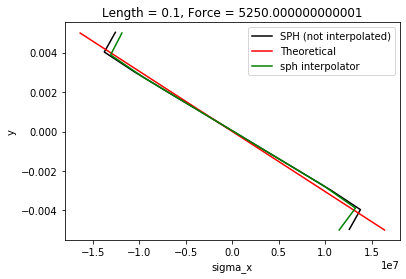

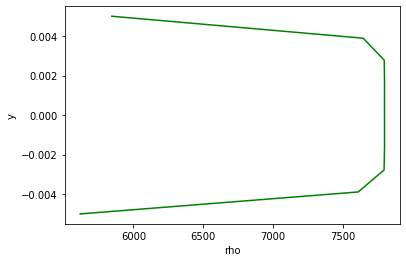

In [18]:
files = 'cantilever_bending_sun2019_len_0_1_damping_0_deflection_1e_minus_4_arti_alpha_1_0_arti_beta_0_0_prof_chandra_output/'
plot_sigma_00_at_midsection(files, 0.1, 0.01, 1e-4, interpolator="sph")

force to be applied is
5250.000000000001


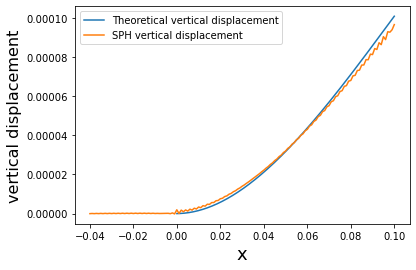

In [116]:
plot_vertical_displacement_of_midway_of_beam_y_0('cantilever_bending_sun2019_len_0_1_damping_0_deflection_1e_minus_4_arti_alpha_1_0_arti_beta_0_0_prof_chandra_output/', 
                                                0.1, 0.01, 1e-4, file_end=-300)

force to be applied is
5250.000000000001
directory name is
vertical_disp_for_a_length_of_steel_0_1_deflection_of_0_0001


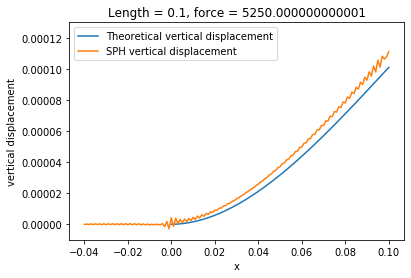

In [10]:
plot_vertical_displacement_of_midway_of_beam_y_0_many_plots('cantilever_bending_sun2019_len_0_1_damping_0_deflection_1e_minus_4_arti_alpha_1_0_arti_beta_0_0_prof_chandra_output/', 
                                                            0.1, 0.01, 1e-4, directory_name=None, step=30)

# Bending of a cantilever beam with length 0.2m and 0.01 m with a deflection of 1e-4.

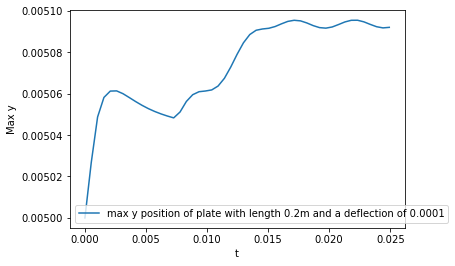

In [105]:
folder = 'cantilever_bending_sun2019_len_0_2_damping_0_deflection_1e_minus_4_arti_alpha_1_0_arti_beta_0_0_prof_chandra_output/'
plot_max_y_position_of_beam(folder, 0.2, 1e-4, 30)

(array([1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935]),)
0.095
SPH sigma_00 is  [ 2835438.53223168  3101290.28331534  2372487.18022758  1590158.78213687
   787420.12821588     4731.57490942  -796251.93935083 -1582218.371443
 -2373289.54483367 -3094696.22300453 -2829640.16576449]
maximum of sigma_00 is  3.1012902833153353  mpa
force to be applied is
656.2500000000001
sigma00_for_a_length_of_0_2_deflection_of_0_0001


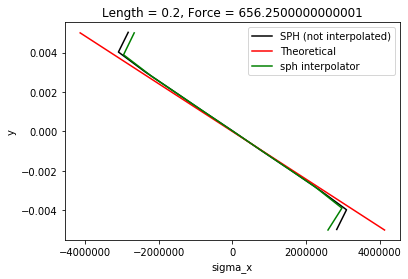

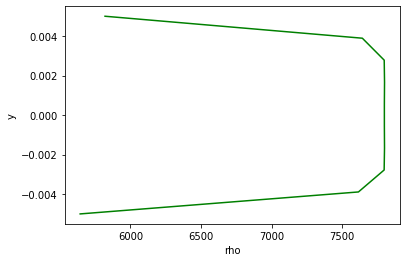

In [25]:
folder = 'cantilever_bending_sun2019_len_0_2_damping_0_deflection_1e_minus_4_arti_alpha_1_0_arti_beta_0_0_prof_chandra_output/'
plot_sigma_00_at_midsection(folder, 0.2, 0.01, 1e-4, interpolator="sph")

force to be applied is
656.2500000000001


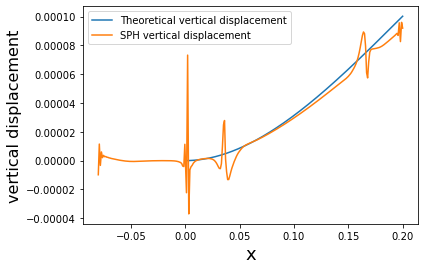

In [118]:
folder = 'cantilever_bending_sun2019_len_0_2_damping_0_deflection_1e_minus_4_arti_alpha_1_0_arti_beta_0_0_prof_chandra_output/'
plot_vertical_displacement_of_midway_of_beam_y_0(folder, 0.2, 0.01, 1e-4, file_end=-300)

force to be applied is
656.2500000000001
directory name is
vertical_disp_for_a_length_of_0_2_deflection_of_0_0001
[Errno 17] File exists: 'vertical_disp_for_a_length_of_0_2_deflection_of_0_0001'


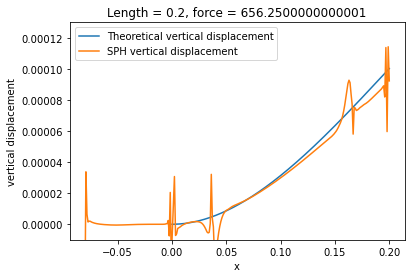

In [119]:
plot_vertical_displacement_of_midway_of_beam_y_0_many_plots('cantilever_bending_sun2019_len_0_2_damping_0_deflection_1e_minus_4_arti_alpha_1_0_arti_beta_0_0_prof_chandra_output/', 
                                                            0.2, 0.01, 1e-4, directory_name=None, step=30)

# Bending of a cantilever beam with length 0.05m and 0.01 m with a deflection of 1e-4.

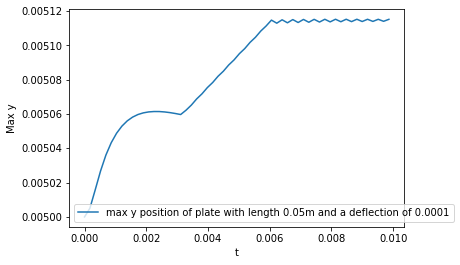

In [92]:
folder = 'cantilever_bending_sun2019_len_0_05_damping_0_deflection_1e_minus_4_arti_alpha_1_0_arti_beta_0_0_prof_chandra_output/'
plot_max_y_position_of_beam(folder, 0.05, 1e-4, 30)

(array([484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494]),)
0.023999999999999994
SPH sigma_00 is  [ 45526301.13430887  50223801.19335267  38819051.31814351
  25446646.70954686  12468506.11938295   -219587.92625196
 -12492935.45985644 -25806633.31220769 -38989378.77831818
 -50364092.22158562 -46126806.96976601]
maximum of sigma_00 is  50.22380119335267  mpa
force to be applied is
42000.00000000001
sigma00_for_a_length_of_0_05_deflection_of_0_0001


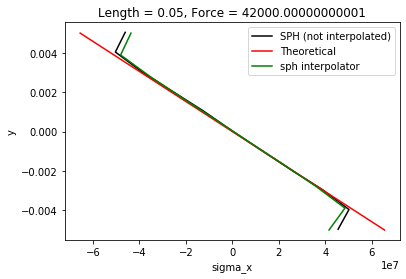

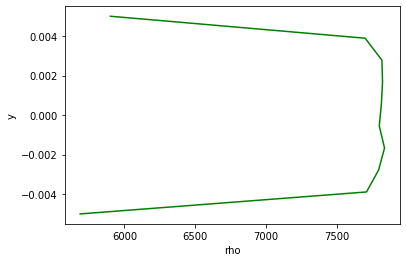

In [26]:
folder = 'cantilever_bending_sun2019_len_0_05_damping_0_deflection_1e_minus_4_arti_alpha_1_0_arti_beta_0_0_prof_chandra_output/'
plot_sigma_00_at_midsection(folder, 0.05, 0.01, 1e-4, interpolator="sph")

force to be applied is
42000.00000000001


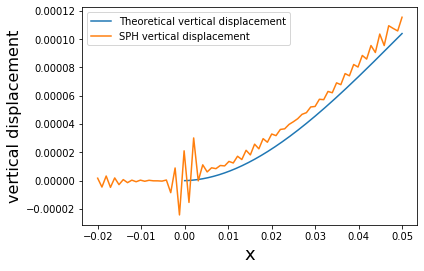

In [10]:
folder = 'cantilever_bending_sun2019_len_0_05_damping_0_deflection_1e_minus_4_arti_alpha_1_0_arti_beta_0_0_prof_chandra_output/'
plot_vertical_displacement_of_midway_of_beam_y_0(folder, 0.05, 0.01, 1e-4, file_end=-300)

force to be applied is
42000.00000000001
directory name is
vertical_disp_for_a_length_of_0_05_deflection_of_0_0001


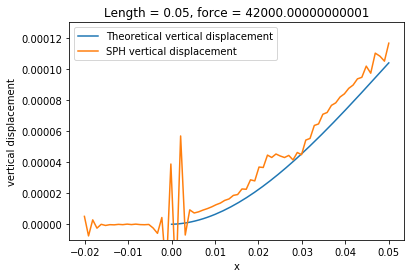

In [11]:
plot_vertical_displacement_of_midway_of_beam_y_0_many_plots('cantilever_bending_sun2019_len_0_05_damping_0_deflection_1e_minus_4_arti_alpha_1_0_arti_beta_0_0_prof_chandra_output/', 
                                                            0.05, 0.01, 1e-4, directory_name=None, step=30)

force to be applied is
42000.00000000001
sigma01_for_a_length_of_0_05_deflection_of_0_0001


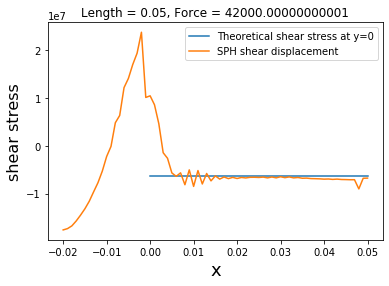

In [14]:
folder = 'cantilever_bending_sun2019_len_0_05_damping_0_deflection_1e_minus_4_arti_alpha_1_0_arti_beta_0_0_prof_chandra_output/'
plot_shear_stress_of_midway_of_beam_y_0(folder, 0.05, 0.01, 1e-4, file_end=-1)

force to be applied is
5250.000000000001
sigma01_for_a_length_of_0_1_deflection_of_0_0001


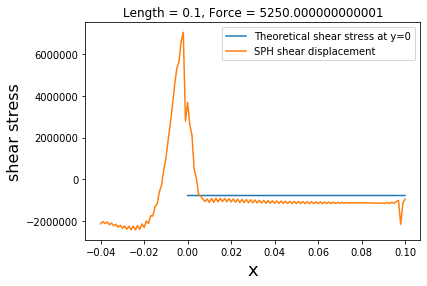

In [15]:
folder = 'cantilever_bending_sun2019_len_0_1_damping_0_deflection_1e_minus_4_arti_alpha_1_0_arti_beta_0_0_prof_chandra_output/'
plot_shear_stress_of_midway_of_beam_y_0(folder, 0.1, 0.01, 1e-4, file_end=-1)

force to be applied is
656.2500000000001
sigma01_for_a_length_of_0_2_deflection_of_0_0001


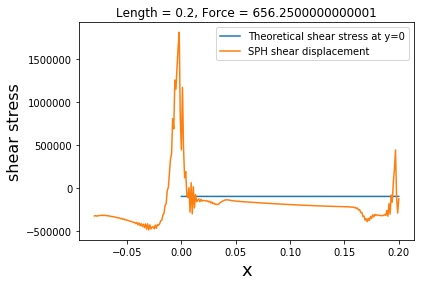

In [16]:
folder = 'cantilever_bending_sun2019_len_0_2_damping_0_deflection_1e_minus_4_arti_alpha_1_0_arti_beta_0_0_prof_chandra_output/'
plot_shear_stress_of_midway_of_beam_y_0(folder, 0.2, 0.01, 1e-4, file_end=-300)

force to be applied is
5250.000000000001
directory name is
vertical_disp_for_a_length_of_0_1_deflection_of_0_0001
[Errno 17] File exists: 'vertical_disp_for_a_length_of_0_1_deflection_of_0_0001'


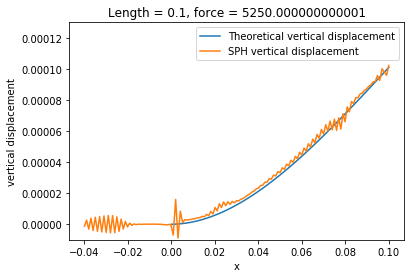

In [27]:
plot_vertical_displacement_of_midway_of_beam_y_0_many_plots('cantilever_bending_sun2019_len_0_1_damping_0_deflection_1e_minus_4_arti_alpha_1_0_arti_beta_0_0_edac_output/', 
                                                            0.1, 0.01, 1e-4, directory_name=None, step=30)

# Similar analysis with aluminium material


force to be applied is
17.619379014989295
directory name is
vertical_disp_for_a_length_of_aluminium_0_1_deflection_of_0_001
[Errno 17] File exists: 'vertical_disp_for_a_length_of_aluminium_0_1_deflection_of_0_001'


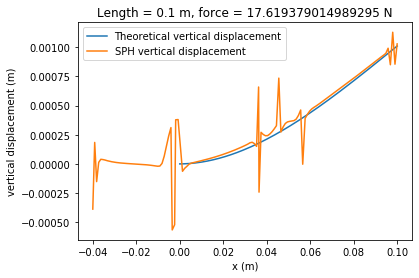

In [22]:
plot_vertical_displacement_of_midway_of_beam_y_0_many_plots('cantilever_bending_sun2019_len_0_1_damping_0_deflection_material_aluminium_1e_minus_3_arti_alpha_1_0_arti_beta_0_0_output/', 
                                                            0.1, 0.01, 1e-3, directory_name=None, step=30, material="aluminium")

force to be applied is
176.19
directory name is
vertical_disp_for_a_length_of_aluminium_0_1_deflection_of_0_01
[Errno 17] File exists: 'vertical_disp_for_a_length_of_aluminium_0_1_deflection_of_0_01'


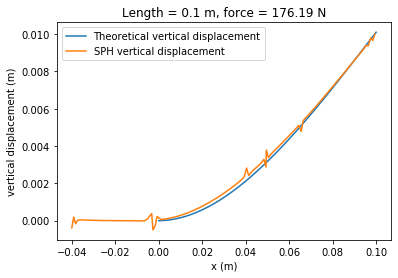

In [26]:
plot_vertical_displacement_of_midway_of_beam_y_0_many_plots('cantilever_bending_sun2019_len_0_1_damping_0_deflection_material_aluminium_1e_minus_2_arti_alpha_1_0_arti_beta_0_0_output/', 
                                                            0.1, 0.01, 1e-2, directory_name=None, step=30, material="aluminium")

# Plot pressure of a single particle with time

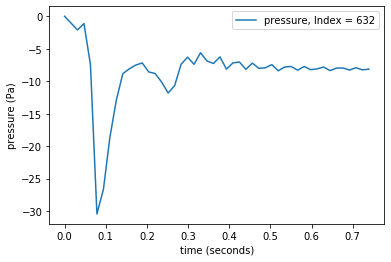

In [15]:
def plot_pressure_of_a_single_particle(folder, index, step=30):
    files = get_files(folder)
    t, pressure = [], []
    for sd, array in iter_output(files[::step], 'plate'):
        _t = sd['t']
        t.append(_t)
        pressure.append(array.p[index])
        
    label = "pressure, Index = " + str(index)
    plt.plot(t, pressure, label=label)
    plt.xlabel("time (seconds)")
    plt.ylabel("pressure (Pa)")
    plt.legend()
    plt.savefig("pressure", dpi=400)


plot_pressure_of_a_single_particle('cantilever_bending_sun2019_len_0_1_damping_0_deflection_material_aluminium_1e_minus_3_arti_alpha_1_0_arti_beta_0_0_output/', 
                                    632, step=30)

